In [1]:
from Multiatomic import *

### Example 1: Diatomic, Harmonic, Velocity-Verlet

In [2]:
def diatomicHarmonic(atoms, params) -> float:
    if (debugMode):
        if (not isinstance(atoms, np.ndarray)):
            raise RuntimeError("Invalid atoms. Must be a NumPy array.")
        if (len(atoms) != 2):
            raise RuntimeError("Invalid no. atoms. Must be 2.")
        for atom in atoms:
            if (not isinstance(atom, Atom)):
                raise RuntimeError("Invalid atoms. Must be Atom type.")
        if (len(params) != 2):
            raise RuntimeError("Invalid no. arguments. Must be 2.")
        if (not "re" in params or not "k" in params):
            raise RuntimeError("Invalid params. Must provide re and k.")
        re = params["re"]
        k = params["k"]
        if (not isinstance(re, float) or not isinstance(k, float)):
            raise RuntimeError("Invalid params. Must be float type.")
        if (re <= 0 or k <= 0):
            raise RuntimeError("Invalid params. Must be greater than 0.")
    r = atoms[0].getPosition() - atoms[1].getPosition()
    lengthOfR = np.linalg.norm(r)
    return 0.5 * k * (lengthOfR - re)**2

In [3]:
atom1 = Atom("Atom1", 1.0, np.array([-1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atom2 = Atom("Atom2", 1.0, np.array([1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atoms = np.array([atom1, atom2])
potential = Potential(diatomicHarmonic, re = 1.0, k = 1.0)
molecularSystem = MolecularSystem(atoms, potential)
integratorName = "velocityVerlet"
filepath = thisdir / 'Multiatomic1'
N = 10000
deltaT = 0.001
startTime = time.time()
molecularSystem = simulate(filepath, molecularSystem, integratorName, N, deltaT)
endTime = time.time()
print("Simulation Time:", endTime - startTime, "seconds")

Simulation Time: 24.650777101516724 seconds


In [4]:
aspath = filepath / 'AtomicSeparations.csv'
avdir = filepath / 'AtomicVelocities'
enpath = filepath / 'Energies.csv'

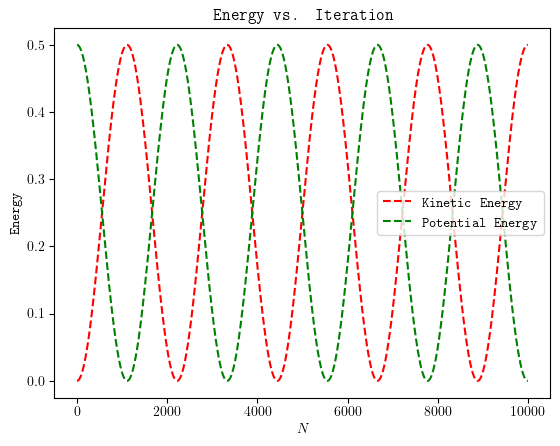

In [5]:
plotEnergies(enpath, "kp")

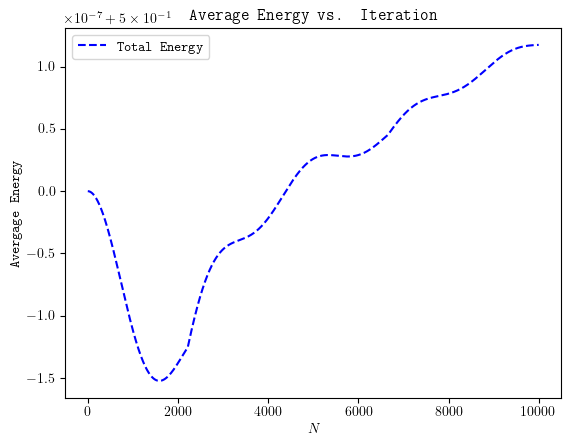

In [6]:
plotRunningAverageEnergies(enpath, "total")

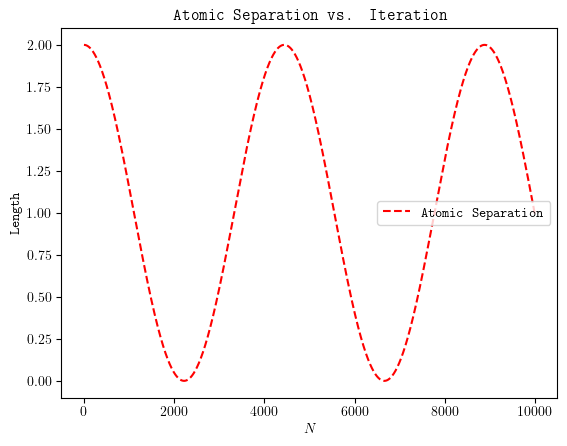

In [7]:
plotAtomicSeparations(aspath, "Atom1-Atom2")

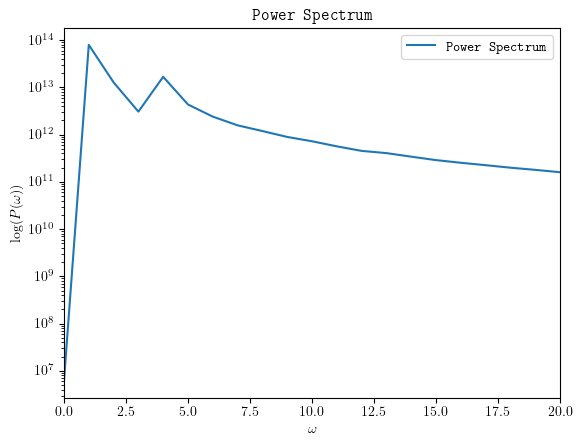

In [8]:
fileNames = molecularSystem.getAtomNames()
vacf = calculateVacf(avdir, fileNames)
powerSpectrum = calculatePowerSpectrum(vacf)
plotPowerSpectrum(avdir, powerSpectrum, [0.0, 20.0], True)

In [9]:
atomicSeparations = pd.read_csv(aspath)
energies = pd.read_csv(enpath)
vv = energies
print("Initial Total Energy:", energies["TE"].iat[0])
print("Final Total Energy:", energies["TE"].iat[-1])
print("Average Total Energy:", np.mean(energies["TE"]))
print("Std. Total Energy:", np.std(energies["TE"]))
print("Average Atomic Separation:", np.mean(atomicSeparations["Atom1-Atom2"]))
print("Std. Atomic Separation:", np.std(atomicSeparations["Atom1-Atom2"]))

Initial Total Energy: 0.4999999999995
Final Total Energy: 0.5000001361679682
Average Total Energy: 0.5000001173799367
Std. Total Energy: 1.670313603894195e-07
Average Atomic Separation: 1.0708393931178288
Std. Atomic Separation: 0.703260433604183
